In [12]:
import sys, os
sys.path.insert(0, '/data1/home/rocks/discrete_elasticity_v2/')
sys.path.insert(0, '/data1/home/rocks/discrete_elasticity_v2/python_src/')

import numpy as np
import scipy as sp
import scipy.optimize as opt
import numpy.random as rand
import numpy.linalg as la
import gzip
import cPickle as pickle
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
%matplotlib inline

import mech_network_solver as mns
import network
import tuning_algs as talgs
import network_plot as nplot
import nonlin_solver as nls

sns.set(color_codes=True)
sns.set_context('poster', font_scale=1.75)
sns.set_palette("hls", 8)
# sns.set_palette("muted", 8)
sns.set_style('ticks', {'xtick.direction': 'in','ytick.direction': 'in', 'axes.linewidth': 2.0})

In [70]:
DIM = 2

eta = 1.0
NTS = 6
Lp = -1.0
NN = 128
irec = 0

nw_label = "network_periodic_jammed/network_N{:05d}_Lp{:.2f}/network_irec{:04d}".format(NN, Lp, irec)

with gzip.open("/data1/home/rocks/data/{:}.pklz".format(nw_label), 'rb') as pkl_file:

    nw_data = pickle.load(pkl_file)
    net = nw_data['network']   
    
    print net.DIM * net.NN
    print net.NE
    
rand.seed(13)

# (inodesi, inodesj, onodesi, onodesj) = talgs.chooseRandomEdges(net, 0)
# print inodesi, inodesj, onodesi, onodesj

# NF = 1

# istrain = [[] for t in range(NF)]
# istrain[0].append(1.0)


256
350


In [71]:
K_init = np.ones(net.NE, float) / net.eq_length

Q = np.zeros([net.DIM*net.NN, net.NE])

DIM = net.DIM
edgei = net.edgei
edgej = net.edgej

for b in range(net.NE):
    bvec = net.bvecij[net.DIM*b:net.DIM*(b+1)]
    
    Q[DIM*edgej[b]:DIM*edgej[b]+DIM, b] = bvec
    Q[DIM*edgei[b]:DIM*edgei[b]+DIM, b] = -bvec

H = Q.dot(np.diag(K_init)).dot(Q.transpose())

A = Q.transpose().dot(la.pinv(H)).dot(Q)

In [72]:
xixi = np.zeros([net.NE, net.NE])

s = rand.randint(net.NE)

for i in range(net.NE):
    for j in range(net.NE):
        ximu = A[i] * A[s]
        xinu = A[j] * A[s]
        
        xixi[i, j] = ximu.dot(xinu)
        
        
print la.norm(xixi / net.NE)**2

1.42712547343e-06


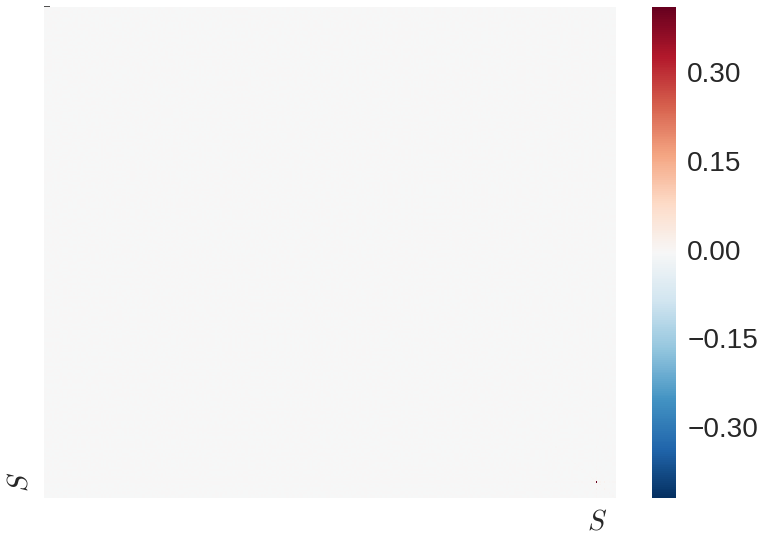

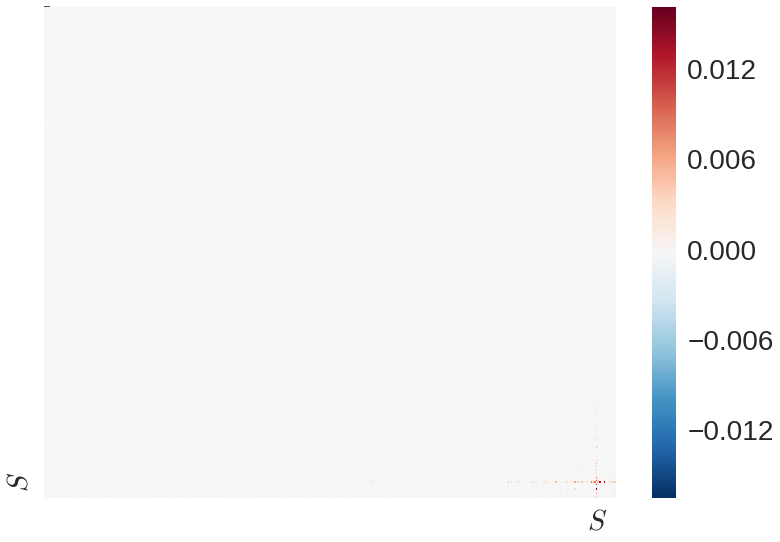

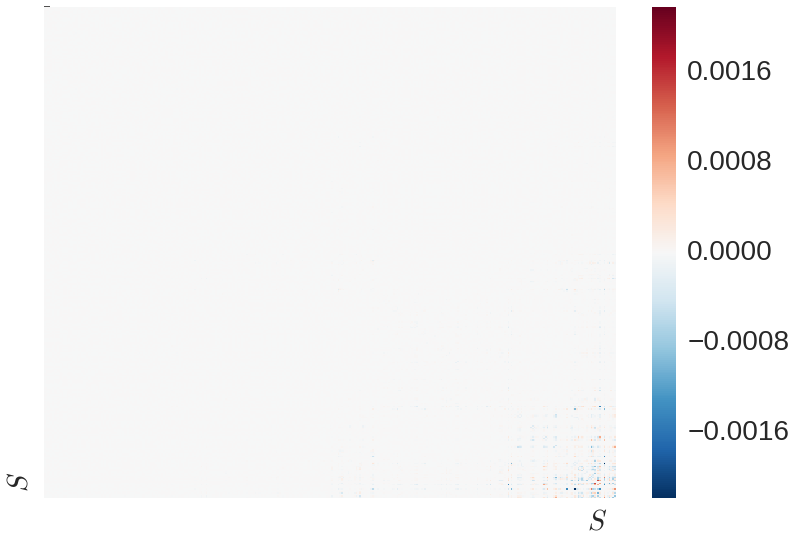

In [74]:
labels = ["" for i in range(net.NE)]
labels[s] = "$S$"

fig, ax = plt.subplots(1,1)
sns.heatmap(xixi, ax=ax, xticklabels=labels, yticklabels=labels)
plt.show()

xixi_mask = xixi.copy()
np.fill_diagonal(xixi_mask, 0.0)

fig, ax = plt.subplots(1,1)
sns.heatmap(xixi_mask, ax=ax, xticklabels=labels, yticklabels=labels)
plt.show()

xixi_mask = xixi.copy()
np.fill_diagonal(xixi_mask, 0.0)
xixi_mask[s, :] = 0.0 
xixi_mask[:, s] = 0.0 
fig, ax = plt.subplots(1,1)
sns.heatmap(xixi_mask, ax=ax, xticklabels=labels, yticklabels=labels)
plt.show()



In [73]:
xixi = np.zeros([net.NE, net.NE])

for i in range(net.NE):
    xi = A[i] * A[s]
    
    xixi += np.outer(xi, xi)
    
print la.norm(xixi / net.NE)**2

1.42712547343e-06


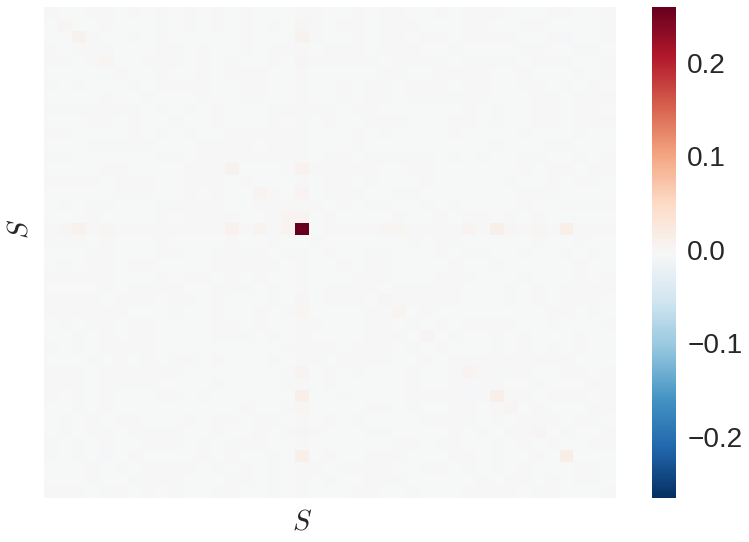

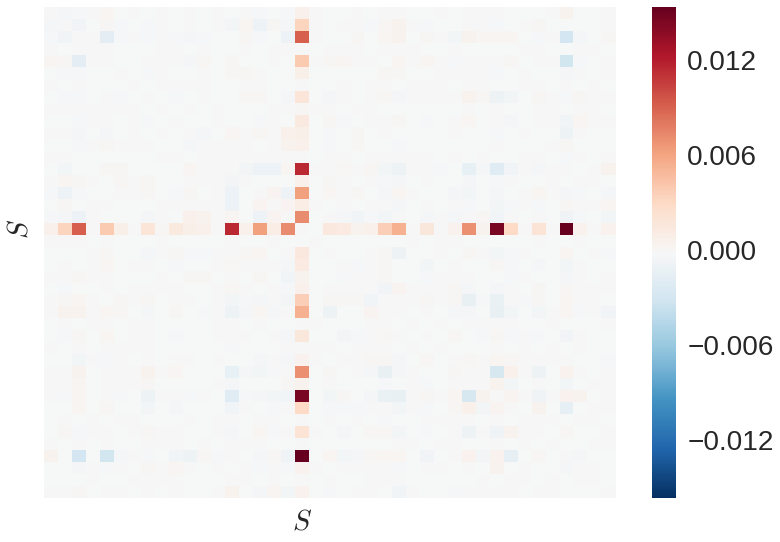

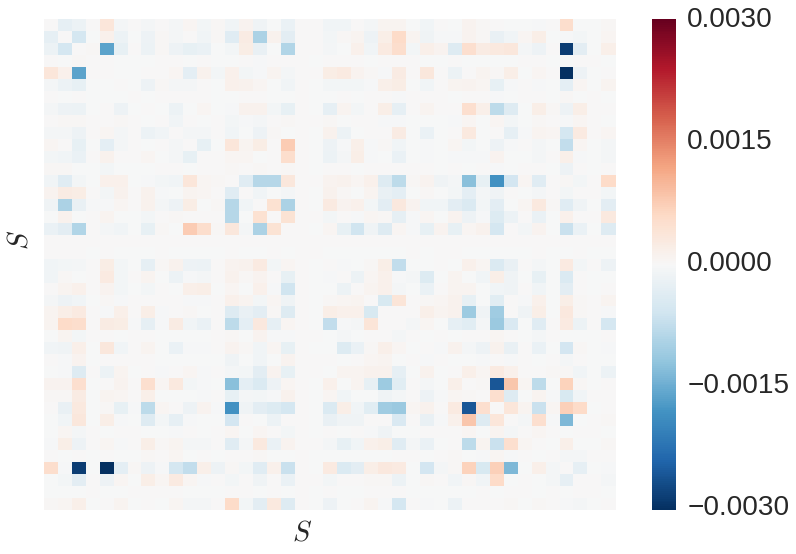

In [48]:
fig, ax = plt.subplots(1,1)
sns.heatmap(xixi, ax=ax, xticklabels=labels, yticklabels=labels)
plt.show()

xixi_mask = xixi.copy()
np.fill_diagonal(xixi_mask, 0.0)

fig, ax = plt.subplots(1,1)
sns.heatmap(xixi_mask, ax=ax, xticklabels=labels, yticklabels=labels)
plt.show()

xixi_mask = xixi.copy()
np.fill_diagonal(xixi_mask, 0.0)
xixi_mask[s, :] = 0.0 
xixi_mask[:, s] = 0.0 
fig, ax = plt.subplots(1,1)
sns.heatmap(xixi_mask, ax=ax, xticklabels=labels, yticklabels=labels)
plt.show()